<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/HW4/Copy_of_MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [133]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
#package used to display latex formuale
from IPython.display import Latex



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [134]:
#example
x = 3
x

3

In [135]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [136]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newron's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

<mark> Newton's law of gravitation:
$$F_{\text{grav}} = \frac{G \, M \, m}{r^{2}}$$
Centripetal force equation:
$$F_{\text{cent}} = \frac{m \, v^{2}}{r}$$
Setting $F_{grav}$ to $F_{cent}$:
$$\frac{G \, M(r) \, m}{r^{2}} = \frac{m \, v^{2}}{r}$$
Canceling mass and rearrange:
$$v^{2} = \frac{G \, M(r)}{r}$$
Mass is assumed to be constant so:
$$v^{2} = \frac{G \, M}{r} \;\;\propto\;\;\frac{1}{r}$$

## M31 rotational curve

### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [137]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/m31.csv")

In [138]:
#I generated this code with gemini, asking it to rename the columns, and to make the columns into floats.
m31.columns = ['r', 'v', 'dv', 'err']
m31 = m31.drop(0).reset_index(drop=True)
m31['r'] = pd.to_numeric(m31['r']) * u.kpc
m31['v'] = pd.to_numeric(m31['v']) * u.km / u.s
m31['dv'] = pd.to_numeric(m31['dv']) * u.km / u.s
m31['err'] = pd.to_numeric(m31['err']) * u.km / u.s

m31["err_tot"] = np.sqrt(m31["dv"]**2 + m31["err"]**2)

m31.head()


,r,v,dv,err,err_tot
0,0.100,183.939,0.000,0.000,0.000000
1,0.120,190.710,10.265,12.191,15.937086
2,0.144,204.141,22.634,21.808,31.430667
3,0.173,207.601,4.573,4.200,6.209052
4,0.207,210.188,3.943,3.258,5.114862


# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [139]:
m31.describe()

,r,v,dv,err,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,152.201397


In [140]:
print("Median")
display(m31.median())
print("Mean")
display(m31.mean())
print(m31.shape)

Median


,0
r,13.737000
v,229.124000
dv,30.697000
err,12.065000
err_tot,32.684957


Mean


,0
r,205.853182
v,226.079255
dv,55.034818
err,16.165855
err_tot,57.781110


(55, 5)


<mark> For r, the median is a lot smaller than the mean, which shows that the data has a tail of larger values. For v, the mean and median are the same. For dv, there might be a tail of smaller values because the median is smaller than the mean, and for err, the mean and median are comparable. For err tot, there might be a tial with smaller values.

Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

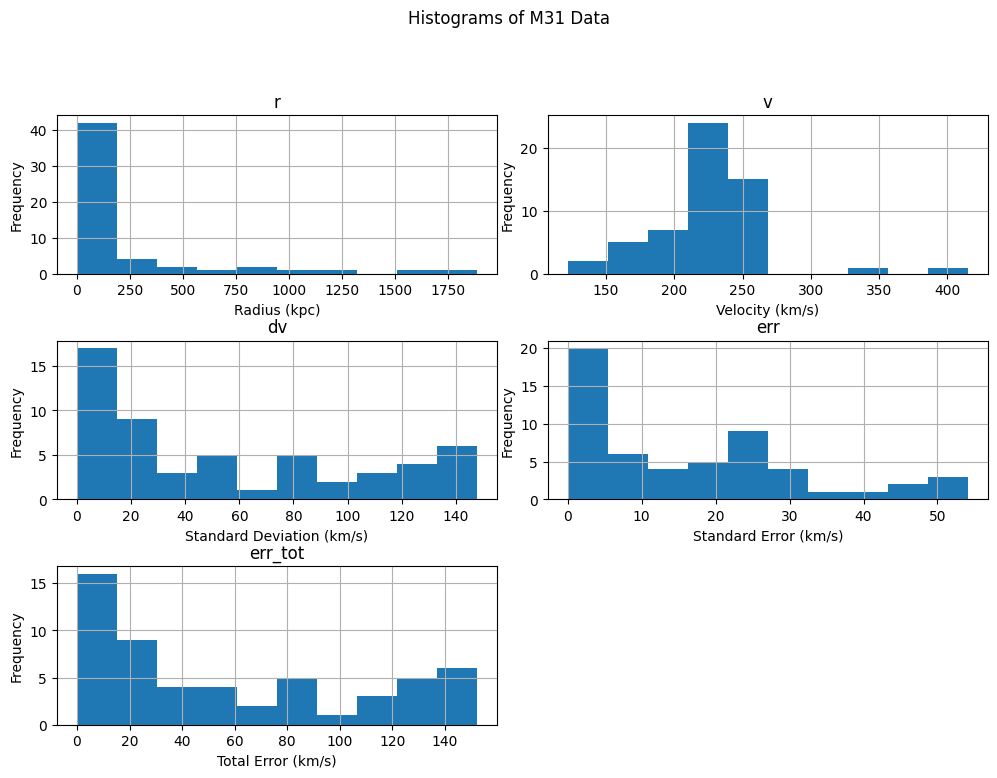

In [141]:
#I used gemini to generate this code. My prompt was "Please generate histograms for each column of the dataframe and include titles and axes labels. "
# Histograms for each column
m31.hist(figsize=(10, 8))
plt.suptitle('Histograms of M31 Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=1.5)

# Add axis labels and units
for i, col in enumerate(m31.columns):
    plt.subplot(m31.shape[1] // 2 + m31.shape[1] % 2, 2, i + 1)
    if col == 'r':
        plt.xlabel('Radius (kpc)')
        plt.ylabel('Frequency')
    elif col == 'v':
        plt.xlabel('Velocity (km/s)')
        plt.ylabel('Frequency')
    elif col == 'dv':
        plt.xlabel('Standard Deviation (km/s)')
        plt.ylabel('Frequency')
    elif col == 'err':
        plt.xlabel('Standard Error (km/s)')
        plt.ylabel('Frequency')
    elif col == 'err_tot':
        plt.xlabel('Total Error (km/s)')
        plt.ylabel('Frequency')

plt.show()

<mark> **Plot Description:** <br>
The above plots are histograms for different M31 data. The distributions include radius (in kpc), velocity (in km/s), stndard deviation of the velocity (in km/s), standard err (in km/s) and total error (in km/s). Since they are histograms they are plotted against their quantity in bins. <br>

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

In [142]:
d = 778 * u.kpc #kpc
d_u = 33 * u.kpc #kpc, pos neg
theta_maj = 3.167 * u.deg #aparent size in deg from wiki
theta_min = 1.0 * u.deg #theta minor in deg from wiki

apparentSizeM31 = 3.167

#L = 2Dtan(theta/2)
#converting deg to rads
theta_maj_r = theta_maj.to(u.rad)
theta_min_r = theta_min.to(u.rad)
#applying linear size eq, small angle approx.
L_maj = d * theta_maj_r / u.rad
L_min = d * theta_min_r / u.rad
#uncertainty
L_maj_u = d_u * theta_maj_r / u.rad
L_min_u = d_u * theta_min_r / u.rad

In [143]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia and me

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [144]:
...

Ellipsis

Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [145]:
...
m31Size = L_maj
m31SizeError = L_maj_u
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 43 kpc +/- 1.8 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [146]:

radmin = m31[m31["r"] >= (43 - 1.8)/2]

radmin.head()
print(radmin.head(1))
print("The smallest radius is 23.738 kpc and the corresponding velocity is 236.511 km/s")

         r        v      dv   err    err_tot
30  23.738  236.511  11.729  1.58  11.834942
The smallest radius is 23.738 kpc and the corresponding velocity is 236.511 km/s


We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [147]:
# first measurement including all mass
def getradii(data, N, size):
  radi = N * size / 2
  smallest = data[data["r"] >= radi].head(1)
  small = smallest["r"].min()
  vel = smallest["v"].min()
  uvel = smallest["err_tot"].min()
  uradi = smallest["err"].min()
  uvel2 = smallest["dv"].min()
  return small, uradi, vel, uvel, uvel2


m31Rds = getradii(m31, 1, m31Size)
m31Rds
print(m31Rds[0])
print(m31Rds[3])
print(m31Rds[2])
print(m31Rds[4])
print(m31Size)
print(m31Rds)


23.738
11.834941529217623
236.511
11.729
43.0036212254938 kpc
(23.738, 1.58, 236.511, 11.834941529217623, 11.729)


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

In [148]:
def plotGal(gal, rds, Title="", lim=80, log=False):
  fig, ax = plt.subplots(dpi = 100)
  plt.plot(gal["r"], gal["v"], color = "tab:blue", label="v")
  plt.errorbar(gal["r"], gal["v"], yerr=gal["err_tot"], color = "tab:blue", fmt = "none")
  plt.plot(getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[2], color="orange", label = "radius")
  plt.errorbar(getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[2], yerr=getradii(gal, 1, rds)[3], color="orange",fmt="none")
  plt.errorbar(getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[2], yerr=getradii(gal, 1, rds)[1], color="black", zorder = 5)
  ax.text(getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[2] - 20 - getradii(gal, 1, rds)[3], f"{getradii(gal, 1, rds)[2]:.1f}\n({getradii(gal, 1, rds)[3]:.1f}, {getradii(gal, 1, rds)[1]:.1f})", ha="center", va="top", fontsize=9)
  plt.plot(getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[2], color="green", label = "2xradius")
  plt.errorbar(getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[2], yerr=getradii(gal, 2, rds)[3], color="green", fmt="none")
  plt.errorbar(getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[2], yerr=getradii(gal, 2, rds)[1], color="black", zorder = 5)
  ax.text(getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[2] - 20 - getradii(gal, 2, rds)[3], f"{getradii(gal, 2, rds)[2]:.1f}\n({getradii(gal, 2, rds)[3]:.1f}, {getradii(gal, 2, rds)[1]:.1f})", ha="center", va="top", fontsize=9)
  plt.plot(getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[2], color="red", label = "3xradius")
  plt.errorbar(getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[2], yerr=getradii(gal, 3, rds)[3], color="red", fmt="none")
  plt.errorbar(getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[2], yerr=getradii(gal, 3, rds)[1], color="black", zorder = 5)
  ax.text(getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[2] - (20 + getradii(gal, 3, rds)[3]), f"{getradii(gal, 3, rds)[2]:.1f}\n({getradii(gal, 3, rds)[3]:.1f}, {getradii(gal, 1, rds)[1]:.1f})", ha="center", va="top", fontsize=9)
  if log: plt.xscale("log")
  else:   plt.xlim(0,lim)
  plt.title(Title)
  plt.legend(loc = "upper left")
  plt.xlabel("Radius (kpc)")
  plt.ylabel("Velocity (km/s)")
  plt.show()


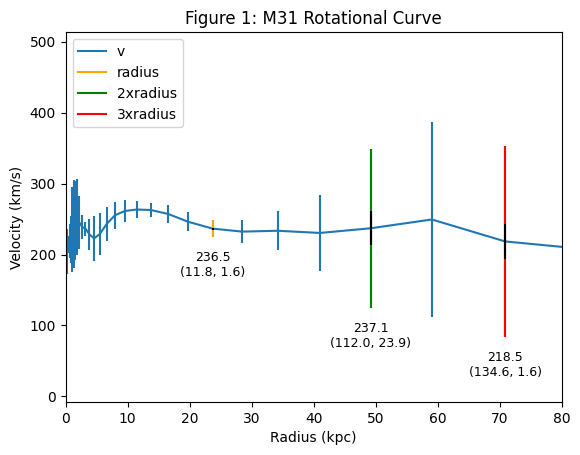

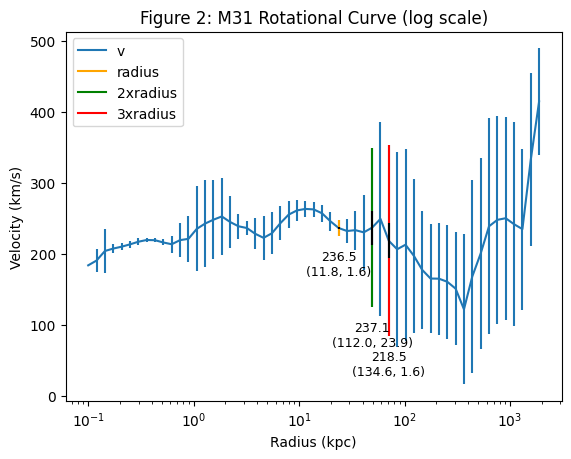

In [149]:
plotGal(m31, m31Size, "Figure 1: M31 Rotational Curve")
plotGal(m31, m31Size, "Figure 2: M31 Rotational Curve (log scale)", 2000, log=True)

<mark> Figure 1 shows the radius distribution (kpc) of M31 with the velocity distribution (km/s) of M31. Figure 2 shows the log10 of the radius distribution with the velocity distribution, showing more data points. <br>
All vertical lines of blue, yellow, green and red are error bars, centered at data points. The blue error bars are the minimum total errors for each velocity at that radius. The yellow, green, and red errorbars are the total error of the velocity at the 1, 2, and 3 multiple of the M31 radius. The black error bars are the standard error of velocity at these specific radii. <br>
We can see that there is a significant difference in value when using the standard error comapred to the total error. The standard error is always smaller than the total error in this data. <br>
It is important which error statistic to include when doing astronomical data analysis because formulae that involve velocity can vary greatly due to the error statistic selected.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [150]:

def vratios(data, luminousradius, N, err=False):
  radii = getradii(data, 1, luminousradius*2)[0]
  radiiN = getradii(data, N, luminousradius*2)[0]
  vel = getradii(data, 1 , luminousradius*2)[2]
  velN = getradii(data, N, luminousradius*2)[2]
  uvel = getradii(data, 1, luminousradius*2)[3]
  uvelN = getradii(data, N, luminousradius*2)[3]
  radiiratio = np.sqrt((radii/radiiN)).item()
  velratio = (velN/vel)
  sigma = (radiiratio*np.sqrt((uvelN/velN)**2 + (uvel/vel)**2)).item()
  sigmaup = radiiratio + sigma
  sigmalow = radiiratio - sigma
  if err:
    if (sigmalow < velratio < sigmaup):
      return radiiratio, velratio, sigma, sigmaup, sigmalow, True
    else:
      return radiiratio, velratio, sigma, sigmaup, sigmalow, False
  else:
    return radiiratio, velratio
  ...


In [151]:
print(vratios(m31, m31Rds[0], 1))

print(vratios(m31, m31Rds[0], 1, err='err'))

(1.0, 1.0)
(1.0, 1.0, 0.07076683461028088, 1.0707668346102808, 0.9292331653897191, True)


In [152]:
vratios(m31, m31Rds[0], 2)

(0.6944523225391628, 1.002359298299022)

In [153]:
print(vratios(m31, m31Rds[0], 2, err='err'))

(0.6944523225391628, 1.002359298299022, 0.32982293600061746, 1.0242752585397803, 0.3646293865385453, True)


In [154]:
print(vratios(m31, m31Rds[0], 3))
print(vratios(m31, m31Rds[0], 3, err='err'))

(0.5282865882623257, 0.873544993678941)
(0.5282865882623257, 0.873544993678941, 0.35316128748652614, 0.8814478757488518, 0.17512530077579952, True)


In [155]:
print(vratios(m31, m31Rds[0], 4))
print(vratios(m31, m31Rds[0], 4, err='err'))

(0.48225557874836705, 0.9006008177209517)
(0.48225557874836705, 0.9006008177209517, 0.3080985506875588, 0.7903541294359259, 0.17415702806080824, False)


### Discuss!

<mark> The ratio of the velocities compared to the ratio of the radii passes the test for up to 3 times the radius. 4 times the size of the radius does not pass, demonstrating Vera Rubin's point, that there is something off.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [156]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/mw.csv")

In [157]:
#I generated this code with gemini, asking it to rename the columns, and to make the columns into floats.
mw.columns = ['r', 'v', 'dv', 'err']
mw = mw.drop(0).reset_index(drop=True)
mw['r'] = pd.to_numeric(mw['r'])
mw['v'] = pd.to_numeric(mw['v'])
mw['dv'] = pd.to_numeric(mw['dv'])
mw['err'] = pd.to_numeric(mw['err'])

mw["err_tot"] = np.sqrt(mw["dv"]**2 + mw["err"]**2)

mw.head()


,r,v,dv,err,err_tot
0,0.010,119.061,41.832,32.714,53.104821
1,0.012,115.268,35.199,17.100,39.132846
2,0.014,117.392,35.152,14.429,37.998147
3,0.017,118.475,35.252,14.870,38.259906
4,0.021,110.386,33.817,14.427,36.765851


In [158]:
mw.describe()

,r,v,dv,err,err_tot
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297,52.371692
std,348.144773,52.161901,41.255286,23.513466,46.907703
min,0.010000,93.042000,3.370000,0.868000,3.736562
25%,0.177250,138.676250,12.585500,2.709750,13.190724
50%,3.133500,204.576000,35.288500,13.923000,38.696376
75%,55.298250,235.920500,68.412750,24.791250,73.655114
max,1682.532000,255.300000,165.096000,110.484000,197.217605


In [159]:
print("Median")
display(mw.median())
print("Mean")
display(mw.mean())
print(mw.shape)

Median


,0
r,3.133500
v,204.576000
dv,35.288500
err,13.923000
err_tot,38.696376


Mean


,0
r,142.281500
v,187.101219
dv,48.249063
err,19.003297
err_tot,52.371692


(64, 5)


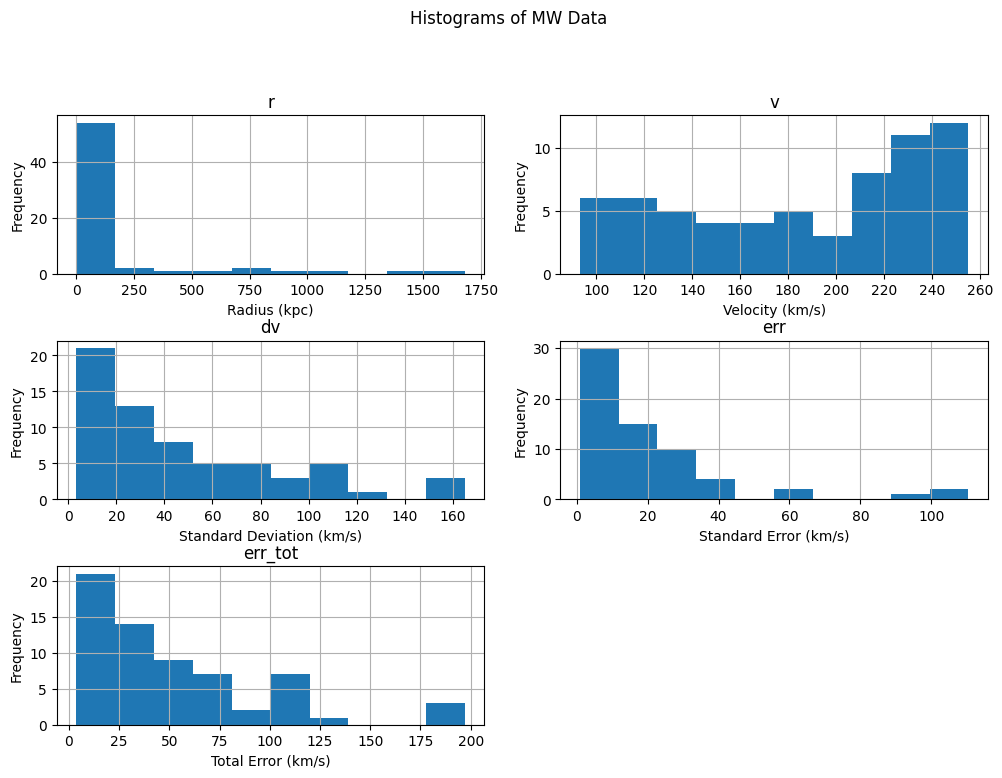

In [160]:
#I used gemini to generate this code. My prompt was "Please generate histograms for each column of the dataframe and include titles and axes labels. "
# Histograms for each column
mw.hist(figsize=(10, 8))
plt.suptitle('Histograms of MW Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=1.5)

# Add axis labels and units
for i, col in enumerate(mw.columns):
    plt.subplot(mw.shape[1] // 2 + mw.shape[1] % 2, 2, i + 1)
    if col == 'r':
        plt.xlabel('Radius (kpc)')
        plt.ylabel('Frequency')
    elif col == 'v':
        plt.xlabel('Velocity (km/s)')
        plt.ylabel('Frequency')
    elif col == 'dv':
        plt.xlabel('Standard Deviation (km/s)')
        plt.ylabel('Frequency')
    elif col == 'err':
        plt.xlabel('Standard Error (km/s)')
        plt.ylabel('Frequency')
    elif col == 'err_tot':
        plt.xlabel('Total Error (km/s)')
        plt.ylabel('Frequency')

plt.show()

<mark>*Plot Description:* <br>
The above plots are histograms for different Milky way data. The distributions include radius (in kpc), velocity (in km/s), stndard deviation of the velocity (in km/s), standard err (in km/s) and total error (in km/s). Since they are histograms they are plotted against their quantity in bins.

In [161]:
mwsize = 26.8 * u.kpc
mwu = 1.1 * u.kpc


In [162]:
radminmw = mw[mw["r"] >= (26.8 - 1.1)/2]

radminmw.head()
print(radminmw.head(1))
print("The smallest radius is 14.698 and the corresponding velocity is 247.075")

         r        v      dv    err   err_tot
40  14.698  247.075  42.102  4.069  42.29817
The smallest radius is 14.698 and the corresponding velocity is 247.075


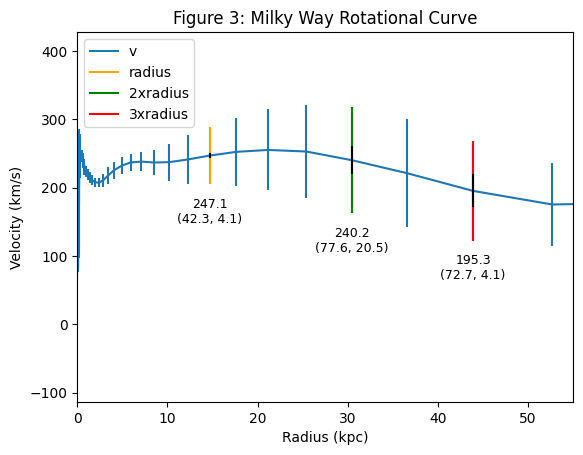

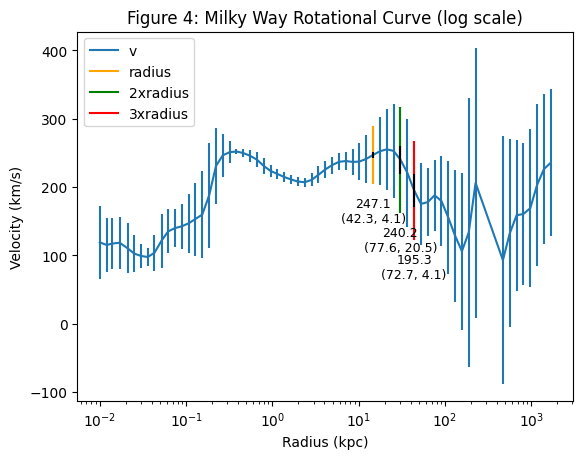

In [163]:
plotGal(mw, mwsize, "Figure 3: Milky Way Rotational Curve", 55)
plotGal(mw, mwsize, "Figure 4: Milky Way Rotational Curve (log scale)", 55, log=True)

<mark> **Figure 3, 4** <br>
Both figures show the rotational curve of the Milky Way. Figure 3 shows the radius in kpc on the x axis and the velocity in km/s on the y axis. Figure 4 shows the log10 of the radius distribution with the velocity on the x axis distribution, showing more data points. <br>
All vertical lines of blue, yellow, green and red are error bars, centered at data points. The blue error bars are the minimum total errors for each velocity at that radius. The yellow, green, and red errorbars are the total error of the velocity at the 1, 2, and 3 multiple of the M31 radius. The black error bars are the standard error of velocity at these specific radii. <br>
We can see that there is a significant difference in value when using the standard error comapred to the total error. The standard error is always smaller than the total error in this data. <br>
It is important which error statistic to include when doing astronomical data analysis because formulae that involve velocity can vary greatly due to the error statistic selected.

In [164]:
print(vratios(mw, mwsize/2, 1))

print(vratios(mw, mwsize/2, 1, err='err'))

print(vratios(mw, mwsize/2, 2))

print(vratios(mw, mwsize/2, 2, err='err'))


(1.0, 1.0)
(1.0, 1.0, 0.24210723601087217, 1.2421072360108723, 0.7578927639891279, True)
(0.6944532488422636, 0.9720327835677426)
(0.6944532488422636, 0.9720327835677426, 0.25404906355535883, 0.9485023123976224, 0.4404041852869047, False)


### Discuss!
<mark>
For the milky way, the test fails earlier at 2 times the size of the radius.

https://en.wikipedia.org/wiki/Milky_Way
    